# NLP DISASTER TWEETS: EDA, NLP, SVM
## Table of Contents

### Introduction

### Libraries

### Loading Data

Exploratory Data Analysis

Analyzing labels   
Analyzing features   
Analyzing sentence length
    

### Data Cleaning
  Remove URL 
  
  Handle Tags     
  
  Handle Emoji   
  
  Remove HTML Tags     
  
  Remove Stopwords and Stemming     
  
  Remove Useless Characters   
  
  WORLDCLOUD

### Final Pre-Processing Data

### Machine Learning
  
  Support Vector Machine (SVM)
  RBF kernel SVM

### Results

### Conclusion
### Introduction

My name is Md Sakib . I have chosen this dataset to show my NLP techniques as i found that NLP is a very important subset of Data-Science and Regular Expression(re) in NLP is itself a domain in ML.
Till now i found that Kaggle is the right place to practice with recent technologies in the area of data science
and ML and good place to refer all finds of data science and ML related projects. In this ipynb file i have 
analyzed the dataset using EDA technique , after that i have used different NLP techniques to preprocess the data before feeding it to my SVM model and then i finally preprocessed it and feed it to my SVM model and then i have uploaded the final predicted y output by attaching it to the sample_submission to kaggle which gave me a score of around 78 percent .

https://www.kaggle.com/c/nlp-getting-started/overview

The above link of Kaggle Challenge this is the link from where i got the dataset


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# Loading Data

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [51]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [52]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [53]:
train.shape,test.shape

((7613, 5), (3263, 4))

# EDA

In [54]:
train[train["target"] == 0]["text"].values[4]

'What a goooooooaaaaaal!!!!!!'

In [55]:
train[train["target"] == 1]["text"].values[6]

'#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'

### Checking class imbalance

/home/shakkib/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

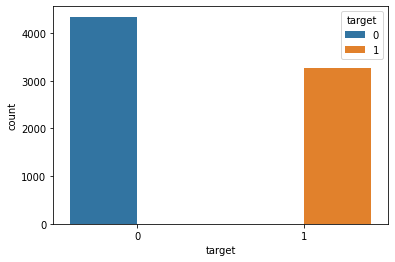

In [56]:
fig = plt.figure()
sns.countplot(train['target'],  hue=train['target'])

### Analyzing the length in each tweet

In [57]:
text_len=train[train['target']==1]['text'].str.len().max()
print(f'The maxmum length of disaster tweets:',text_len)

The maxmum length of disaster tweets: 151


In [58]:
text_len=train[train['target']==0]['text'].str.len().max()
print(f'The maxmum length of NOT disaster tweets:',text_len)


The maxmum length of NOT disaster tweets: 157


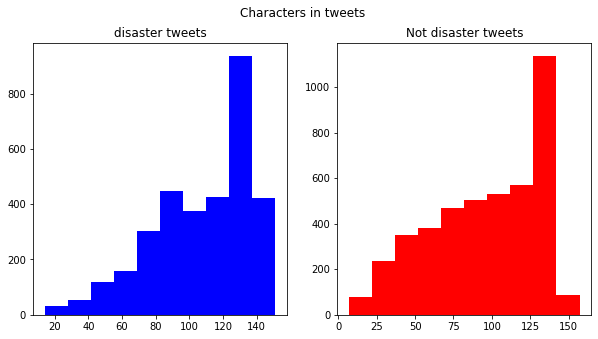

In [59]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()



### target analysis

In [60]:
avg_disaster=train[train['target']==1]['target'].count()
print(f'The average of disaster tweets:',avg_disaster/100,'%')

The average of disaster tweets: 32.71 %


In [61]:
avg_disaster=train[train['target']==0]['target'].count()
print(f'The average of not disaster tweets:',avg_disaster/100,'%')

The average of not disaster tweets: 43.42 %


In [62]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
train['length'] = train['text'].apply(lambda x: len(word_tokenize(x)))
train

[nltk_data] Downloading package punkt to /home/shakkib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,24
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,18
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,24
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,21


In [63]:
train[train.target==0]

,id,keyword,location,text,target,length
15,23,NaN,NaN,What's up man?,0,5
16,24,NaN,NaN,I love fruits,0,3
17,25,NaN,NaN,Summer is lovely,0,3
18,26,NaN,NaN,My car is so fast,0,5
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,9
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,18
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,16
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,18
7587,10841,NaN,NaN,Sirens everywhere!,0,3


In [64]:
train[train.target==1]

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,24
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,18
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,24
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,21


In [65]:
train.drop(columns=['length'], inplace =True)

In [66]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Data Preprocessing

In [67]:
machine = train.isnull().sum()
machine

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [68]:
fachine = test.isnull().sum()
fachine

id             0
keyword       26
location    1105
text           0
dtype: int64

In [69]:
for x in [train,test]:
    for y in ['keyword','location']:
        x[y] = x[y].fillna('lul')

In [70]:
train.head()

,id,keyword,location,text,target
0,1,lul,lul,Our Deeds are the Reason of this #earthquake M...,1
1,4,lul,lul,Forest fire near La Ronge Sask. Canada,1
2,5,lul,lul,All residents asked to 'shelter in place' are ...,1
3,6,lul,lul,"13,000 people receive #wildfires evacuation or...",1
4,7,lul,lul,Just got sent this photo from Ruby #Alaska as ...,1


## Applying different NLP techniques

In [71]:
nltk.download('wordnet')
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
test.head()
train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
train.head(10)


[nltk_data] Downloading package wordnet to /home/shakkib/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shakkib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,lul,lul,Our Deeds are the Reason of this #earthquake M...,1
1,4,lul,lul,Forest fire near La Ronge Sask. Canada,1
2,5,lul,lul,All residents asked to 'shelter in place' are ...,1
3,6,lul,lul,"13,000 people receive #wildfires evacuation or...",1
4,7,lul,lul,Just got sent this photo from Ruby #Alaska as ...,1
5,8,lul,lul,#RockyFire Update => California Hwy. 20 closed...,1
6,10,lul,lul,#flood #disaster Heavy rain causes flash flood...,1
7,13,lul,lul,I'm on top of the hill and I can see a fire in...,1
8,14,lul,lul,There's an emergency evacuation happening now ...,1
9,15,lul,lul,I'm afraid that the tornado is coming to our a...,1


In [72]:
def Clean(text):
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text) #remove URL
    
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>') #remove special character 
    
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
   
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

def stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [73]:
train['text']=train['text'].apply(lambda x: Clean(x))
test['text']=test['text'].apply(lambda x: Clean(x))

In [74]:
train['text_tokens'] = train['text'].apply(lambda x: word_tokenize(x))
test['text_tokens']  = train['text'].apply(lambda x: word_tokenize(x))
train.head()

,id,keyword,location,text,target,text_tokens
0,1,lul,lul,Our Deeds are the Reason of this earthquake Ma...,1,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,lul,lul,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,lul,lul,All residents asked to shelter in place are be...,1,"[All, residents, asked, to, shelter, in, place..."
3,6,lul,lul,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation..."
4,7,lul,lul,Just got sent this photo from Ruby Alaska as s...,1,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [75]:
train['text_tokens']=train['text'].apply(lambda x: stemmer(x))
test['text_tokens']=test['text'].apply(lambda x: stemmer(x))

train['text_tokens']=train['text'].apply(lambda x: lemmatizer(x))
test['text_tokens']=test['text'].apply(lambda x: lemmatizer(x))


In [76]:
train['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    The out of control wild fires in California ev...
7610              M194 [0104 UTC]?5km S of Volcano Hawaii
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

In [77]:
test['text']

0                      Just happened a terrible car crash
1       Heard about earthquake is different cities sta...
2       there is a forest fire at spot pond geese are ...
3                   Apocalypse lighting Spokane wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENERS...
3259    Storm in RI worse than last hurricane My citya...
3260                     Green Line derailment in Chicago
3261             MEG issues Hazardous Weather Outlook HWO
3262    CityofCalgary has activated its Municipal Emer...
Name: text, Length: 3263, dtype: object

### In kaggle , we have 1) train.csv 2) test.csv 3) sample_submission.csv 
What we do here is we split the train.csv into 80:20 ratio which is known as valiadation data to train our 
model from this 80:20 splitted data to get an idea of our model's performance and then we finally predict on the 
test.csv data on our trained model then we attach our model's prediction in sample_submission.csv and Kaggle 
will take care of the score which F1 score here in this case 

## Splitting the data

In [78]:
feature=train['text']
target =train['target']

X_train, X_test, Y_train, Y_test = train_test_split(feature,target,test_size = 0.2,random_state =24)

In [79]:
X_train.head(50)

7306    Climate Change CNN weather specialist warningw...
5627    Refugee Connections Indiegogo campaign will be...
3231    Want to work in Tarzana CA? View our latest op...
7121    Slow clap for this pilot Dramatic Video Shows ...
3429    Learn How I Gained Access To The Secrets Of Th...
7298    Map shows where all of Californias wildfires a...
5178    But time began at last to obliterate the fresh...
6697                                     thunder is legit
2015    Glaucoma occurs when fluid builds up pressure ...
1320    Parents are taking their kids to Burning Man a...
5842    Im so anxious though because so many ppl will ...
3903                                      flattened frog?
4442    much of which has to do with lebanon 80s attac...
1823    heard this few days ago while driving and near...
7467    ME says many of these wounds could be fatal so...
7506    Wreckage Confirmed As Part of Missing Malaysia...
1292    Watch how bad that fool get burned in coverage...
7013    My boy

In [80]:
X_test.head(50)

3068    Kids got Disney version of the game Operation ...
3148    UPDATE Indiana State Police reopening I65 near...
3139    God forbid anyone in my family knows how to an...
7485    First wreck today So so glad me and mom are ok...
6023    Exploration takes seismic shift in Gabon to So...
4441    Wtf? Her biological father is holding her host...
3291    California amp039monsteramp039 fire is 20 cont...
1709    Mind blown by slithering viscous Gold Mine cov...
6664    Generational British schism over privacy threa...
1217    Bradford Back to doing what we do best Burning...
619     In Lies We Trust dvd CIA Hollywood and Bioterr...
4667    youre correct it is coming from both sides May...
3733    The number of people denying climate change on...
5880                                      I liked a video
356     But if you build an army of 100 dogs and their...
890     I have the Forrest version from 83 thats blood...
2988    Only URs and SRs matter Rs youll be drowning i...
1590    Jumps 

In [81]:
Y_test

3068    0
3148    1
3139    0
7485    0
6023    0
       ..
4842    1
7481    1
5332    1
5475    0
5958    0
Name: target, Length: 1523, dtype: int64

In [82]:
Y_train

7306    1
5627    1
3231    0
7121    1
3429    0
       ..
3473    1
343     0
6336    0
899     0
4514    1
Name: target, Length: 6090, dtype: int64

### Making wordcloud for better analyzing the preprocessed text

In [89]:
txt = " ".join(review for review in train['text'])
print ("There are {} words in the combination of all review.".format(len(txt)))

There are 585944 words in the combination of all review.


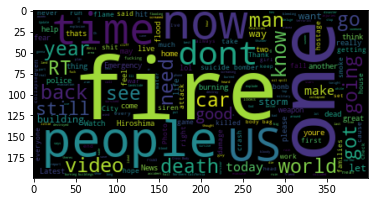

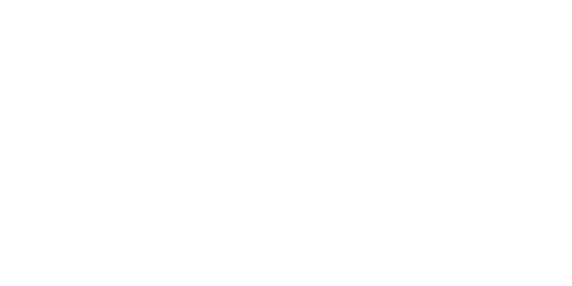

In [84]:
stopwords = set(STOPWORDS)
stopwords.update(["amp","new","u","say","look", "Im","will","love","day","cant"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=200 ,background_color="black",width=400,height=200).generate(txt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
fig = plt.figure(figsize=(10,5))
plt.axis("off")
plt.show()

# Machine Learning Model

In [90]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [94]:
train_vts = count_vectorizer.fit_transform(X_train)
test_vts = count_vectorizer.transform(test['text'])

In [95]:
test_vts

<3263x13055 sparse matrix of type '<class 'numpy.int64'>'
	with 35267 stored elements in Compressed Sparse Row format>

In [96]:
classifier = SVC(kernel = 'rbf',random_state=24)
classifier.fit(train_vts,Y_train)

SVC(random_state=24)

In [97]:
scores = model_selection.cross_val_score(classifier, train_vectors, Y_train, cv=3, scoring="f1")
scores

array([0.70306258, 0.69384934, 0.69390489])

In [99]:
sample_submission = pd.read_csv('sample_submission.csv')


In [100]:
sample_submission['target']=classifier.predict(test_vts)

In [101]:
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [103]:
sample_submission.to_csv("submission0.csv", index=False)

### we have successfully added our predictions made on test.csv and successfully attached it to the sample_submission.csv and renaming it to submission1.csv and after that i am going to upload my submission0.csv to kaggle 

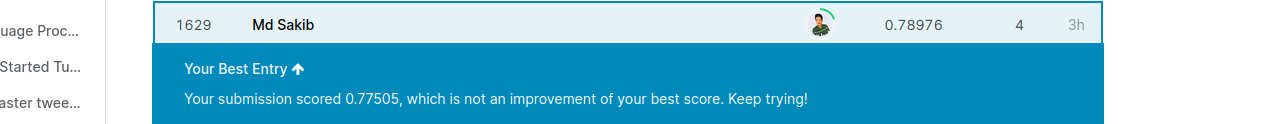